In [ ]:
# -*- coding: utf-8 -*-

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import sys
import os
from sklearn.model_selection import train_test_split as tts

In [2]:
data_df = pd.read_csv(r"C:\Users\Administrator.DAI-PC2\Desktop\DNN\input\breast_cancer_mod.csv")
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,1,1,0
1,0,1,0,0,0,0,0,0,0,1,...,1,0,1,0,1,1,0,1,1,0
2,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
4,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0


In [3]:
RANDOM_STATE = 24 
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE)

NOISE = 0.2
EPOCHS = 200
ALPHA = 0.1
N_SAMPLES = 1000

In [ ]:
params = { 'legend.fontsize': 'medium',
          'figure.figsize' : (15,8),
          'axes.labelsize' : 'large',
          'axes.titlesize' : 'large',
          'xtick.labelsize' : 'large',
          'ytick.labelsize' : 'large'}

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid')

In [5]:
#reading director to make path environment friendly
#inpDir = os.path.join('..', '..', 'input')
inpDir = '../input'
#outDir = '../output'

In [7]:
#directly reading data from directory
data_df1 = pd.read_csv(os.path.join(inpDir, 'breast_cancer_mod.csv'))
data_df1.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,1,1,0
1,0,1,0,0,0,0,0,0,0,1,...,1,0,1,0,1,1,0,1,1,0
2,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
4,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0


In [ ]:
data_df['target'].value_counts()

In [ ]:
data_df.info()

In [ ]:
data_df.describe()

In [ ]:
data_df.target.unique()

In [ ]:
fig, ax = plt.subplots()
data_df['target'].value_counts().plot(ax=ax, kind='bar')

In [8]:
#train test split
feature_df = data_df.drop('target', axis=1) #X  
labels = data_df['target'] #y
TEST_SIZE = 0.2
X_train, X_test, y_train, y_test = tts(feature_df, labels, test_size=TEST_SIZE, stratify=labels, random_state=RANDOM_STATE )

In [ ]:
X_test

In [9]:
X_train['total'] = X_train.astype(np.int16).sum(axis=1)
X_train['target'] = y_train 
X_train.sort_values('total', inplace = True)
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,total,target
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,1,1,12,0
2,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,13,0
1,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1,1,0,1,1,13,0
7,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,15,0
6,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,1,15,0


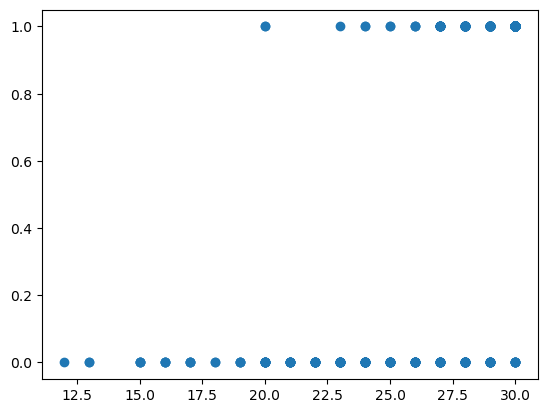

In [18]:
plt.scatter(X_train['total'], X_train['target'])

In [10]:
tmp_df = X_train.groupby(['total', 'target']).agg({'target':'count'})
tmp_df
tmp_df.columns = ['count']
tmp_df.reset_index(inplace=True)
tmp_df.pivot(index='total', columns='target', values='count') #.plot(kind='bar');
tmp_df

,total,target,count
0,12,0,1
1,13,0,2
2,15,0,4
3,16,0,4
4,17,0,4
5,18,0,2
6,19,0,4
7,20,0,10
8,20,1,2
9,21,0,9


In [11]:
accuracy = {}
#here b is threshhold
for b in range(X_train.shape[1]):
    X_train['pred'] = X_train['total'] >= b
    accuracy[b] = accuracy_score(X_train['target'], X_train['pred'])

In [12]:
#index number of best accuracy 
b_best = max(accuracy, key=accuracy.get)
b_best

27

In [13]:
accuracy[b_best]

0.8505494505494505

In [14]:
X_test['total'] = X_test.astype(np.int16).sum(axis=1)
X_test['target'] = y_test 
X_test.sort_values('total', inplace = True)
X_test.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,total,target
3,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,14,0
4,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,14,0
12,0,1,0,0,0,1,0,0,1,1,...,0,0,1,1,1,0,1,1,16,0
18,0,0,0,1,1,0,0,0,0,1,...,0,1,0,1,1,0,1,1,18,0
35,1,1,1,1,0,0,0,0,0,0,...,0,1,0,1,1,0,1,1,20,0


In [16]:
tmp_df1 = X_train.groupby(['total', 'target']).agg({'target':'count'})
tmp_df1
tmp_df1.columns = ['count']
tmp_df1.reset_index(inplace=True)
tmp_df1.pivot(index='total', columns='target', values='count') #.plot(kind='bar');
tmp_df1

,total,target,count
0,12,0,1
1,13,0,2
2,15,0,4
3,16,0,4
4,17,0,4
5,18,0,2
6,19,0,4
7,20,0,10
8,20,1,2
9,21,0,9


In [17]:
X_test['pred'] = X_test['total'] >= b_best
accuracy = accuracy_score(X_test['target'], X_test['pred'])
accuracy

0.868421052631579